# Markovian, Non-Markovian?

![The MDP](figures/markovian.png)

In [6]:
from utils import *
from training import *
from policies import *
from envs import *

In [7]:
n_tries = 1 # Change this to 20 to get the plot from the thesis

Let's train with a non-exponential utility (Non-Markovian Policy, then Markovian) 

In [8]:
LL1,LLu1,LLx1 = [],[],[]
for i in trange(n_tries):
    policy = MicroMicroMLP()
    L,Lu,Lx,_,_ = train(policy, optim.Adam(policy.parameters(), lr=0.01), num_episodes =1000, utility=KT(),log_interval=1,batch_size=50, env=ToyWorld(),draw_policy=False,adaptive_baseline=True)
    LL1.append(L)
    LLu1.append(Lu)
    LLx1.append(Lx)

100%|██████████| 1/1 [00:46<00:00, 46.59s/it]

Loading best state


In [9]:
LL2,LLu2,LLx2 = [],[],[]
for i in trange(n_tries):
    policy = MicroMicroMLP(markovian=False)
    L,Lu,Lx ,_,_= train(policy, optim.Adam(policy.parameters(), lr=0.01), num_episodes =1000, utility=KT(),log_interval=1,batch_size=50, markovian=False,env=ToyWorld(),draw_policy=False,adaptive_baseline=True)
    LL2.append(L)
    LLu2.append(Lu)
    LLx2.append(Lx)

100%|██████████| 1/1 [00:43<00:00, 43.75s/it]

Loading best state


In [10]:
LL3,LLu3,LLx3 = [],[],[]
for i in trange(n_tries):
    policy = MicroMicroMLP()
    L,Lu,Lx,_,_ = train(policy, optim.Adam(policy.parameters(), lr=0.01), num_episodes =1000, utility=(lambda x :1-exp(-0.2*x)),log_interval=1,batch_size=50, env=ToyWorld(),draw_policy=False,adaptive_baseline=True)
    LL3.append(L)
    LLu3.append(Lu)
    LLx3.append(Lx)

100%|██████████| 1/1 [00:54<00:00, 54.60s/it]

Loading best state


In [11]:
LL4,LLu4,LLx4 = [],[],[]
for i in trange(n_tries):
    policy = MicroMicroMLP(markovian=False)
    L,Lu,Lx,_,_ = train(policy, optim.Adam(policy.parameters(), lr=0.01), num_episodes =1000, utility= (lambda x: 1-exp(-0.2*x)),log_interval=1,batch_size=50, markovian=False,env=ToyWorld(),draw_policy=False,adaptive_baseline=True)
    LL4.append(L)
    LLu4.append(Lu)
    LLx4.append(Lx)

100%|██████████| 1/1 [00:54<00:00, 54.89s/it]

Loading best state


We can now plot the results:

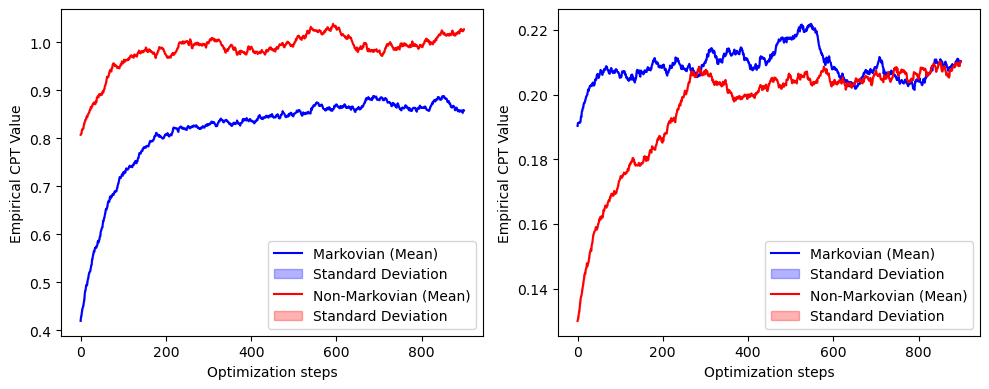

In [12]:
runs_1 = [smooth(elt, 100) for elt in LLu1]
runs_2 = [smooth(elt, 100) for elt in LLu2]

mean_performance_1 = np.mean(runs_1, axis=0)
std_performance_1 = np.std(runs_1, axis=0)

mean_performance_2 = np.mean(runs_2, axis=0)
std_performance_2 = np.std(runs_2, axis=0)

steps = np.arange(len(runs_1[0]))  

# Second figure: Markovian vs Non-Markovian for LLu3 and LLu4
runs_3 = [smooth(elt, 100) for elt in LLu3]
runs_4 = [smooth(elt, 100) for elt in LLu4]

mean_performance_3 = np.mean(runs_3, axis=0)
std_performance_3 = np.std(runs_3, axis=0)

mean_performance_4 = np.mean(runs_4, axis=0)
std_performance_4 = np.std(runs_4, axis=0)

steps = np.arange(len(runs_3[0]))  # Assuming steps are the same for all runs

# Creating the figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plotting in the first subplot
ax1.plot(steps, mean_performance_1, label='Markovian (Mean)', color='blue')
ax1.fill_between(steps, mean_performance_1 - std_performance_1,
                 mean_performance_1 + std_performance_1, color='blue', alpha=0.3, label='Standard Deviation')

ax1.plot(steps, mean_performance_2, label='Non-Markovian (Mean)', color='red')
ax1.fill_between(steps, mean_performance_2 - std_performance_2,
                 mean_performance_2 + std_performance_2, color='red', alpha=0.3, label='Standard Deviation')

ax1.set_xlabel('Optimization steps')
ax1.set_ylabel('Empirical CPT Value')
ax1.legend()



ax2.plot(steps, mean_performance_3, label='Markovian (Mean)', color='blue')
ax2.fill_between(steps, mean_performance_3 - std_performance_3,
                 mean_performance_3 + std_performance_3, color='blue', alpha=0.3, label='Standard Deviation')

ax2.plot(steps, mean_performance_4, label='Non-Markovian (Mean)', color='red')
ax2.fill_between(steps, mean_performance_4 - std_performance_4,
                 mean_performance_4 + std_performance_4, color='red', alpha=0.3, label='Standard Deviation')

ax2.set_xlabel('Optimization steps')
ax2.set_ylabel('Empirical CPT Value')
ax2.legend()

plt.tight_layout()
plt.show()

Non exponential (Left) vs Exponential (Right)